## Fast.Ai - Lesson 1: Image Classification ##

### Flower Classification using Fast.Ai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import *
from fastai import *
import numpy as np
import fastai

In [3]:
path = Path("data/Flowers")
path.ls()


(#5) [Path('data/Flowers/daisy'),Path('data/Flowers/dandelion'),Path('data/Flowers/rose'),Path('data/Flowers/sunflower'),Path('data/Flowers/tulip')]

In [4]:
np.random.seed(42)
#data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, size=256, num_workers=4).normalize(imagenet_stats)
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(512, min_scale=0.75),
                                    bs=32,batch_tfms=[*aug_transforms(size=256, max_warp=0), Normalize.from_stats(*imagenet_stats)],num_workers=0)


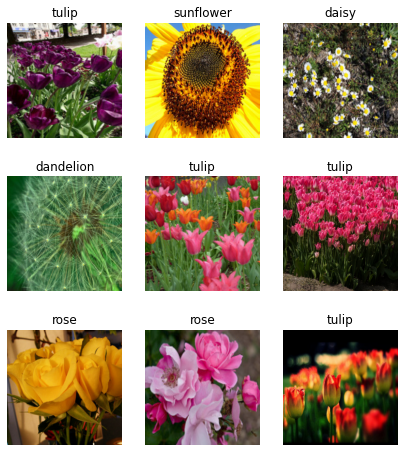

In [5]:
data.show_batch(nrows=3, figsize=(7,8))

### Trainining the model

In [6]:
learn = cnn_learner(data, resnet50, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.729525,0.520864,0.144844,00:54
1,0.395399,0.300074,0.086906,00:52
2,0.249580,0.252699,0.070684,00:53
3,0.169194,0.249426,0.063731,00:54


In [8]:
learn.save('50_Stage -1')

Path('data/Flowers/models/50_Stage -1.pth')

In [9]:
learn.unfreeze()

In [10]:
learn.load("50_Stage -1")

SuggestedLRs(lr_min=3.6307807022240014e-06, lr_steep=1.3182567499825382e-06)

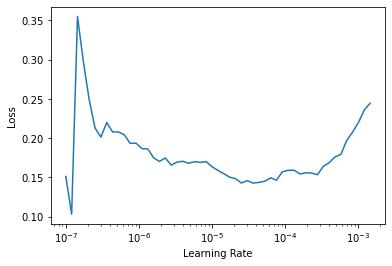

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(2, lr_max=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.178355,0.244985,0.075319,01:00
1,0.125357,0.220801,0.053302,01:00


In [13]:
learn.save("50_Stage -2")

Path('data/Flowers/models/50_Stage -2.pth')

In [14]:
learn.load("50_stage -2")

In [15]:
learn.model = learn.model.cpu()

In [16]:
learn.export()

In [17]:
defaults.device = torch.device('cpu')

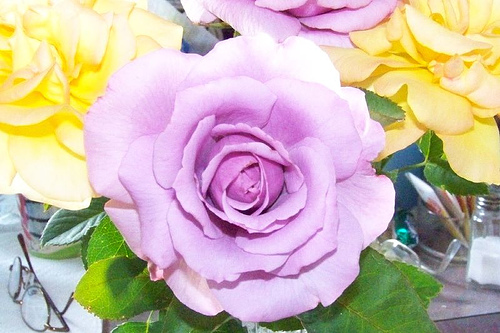

In [18]:
img = Image.open('Test/Flowers/rose.jpg')
img
#img.resize((512,512))

In [19]:
l = load_learner(path/'export.pkl', cpu=True)

In [20]:
defaults.device  = torch.device('cpu')
defaults.device

device(type='cpu')

In [21]:
fnames=get_image_files('Test/Flowers/')
#fnames
pred_class,pred_idx,outputs = l.predict(fnames[2])
pred_class

'rose'